In [3]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
# from rdkit.Chem.Draw import IPythonConsole
# print( rdBase.rdkitVersion )
import networkx as nx
from networkx.readwrite import cytoscape_data
import cyjupyter
from cyjupyter import Cytoscape
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
from urllib import parse

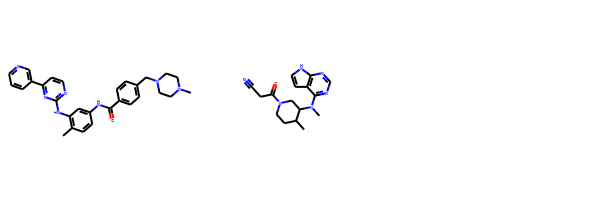

In [4]:
smiles_lsit = [
    "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5",
    "CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N"
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles_lsit]

Draw.MolsToGridImage(mols)

In [5]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()
netwks = rdScaffoldNetwork.CreateScaffoldNetwork([mols[1]], params)

In [6]:
def smi2svg(smi):
    mol = Chem.MolFromSmiles(smi)
    try:
        Chem.rdmolops.Kekulize(mol)
    except:
        pass
    drawer = rdMolDraw2D.MolDraw2DSVG(690, 400)
    AllChem.Compute2DCoords(mol)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace("svg:", "")
    return svg

In [7]:
def smi2image(smi):
    svg_string = smi2svg(smi)
    impath = 'data:image/svg+xml;charset=utf-8,' + parse.quote(svg_string, safe="")
    return impath

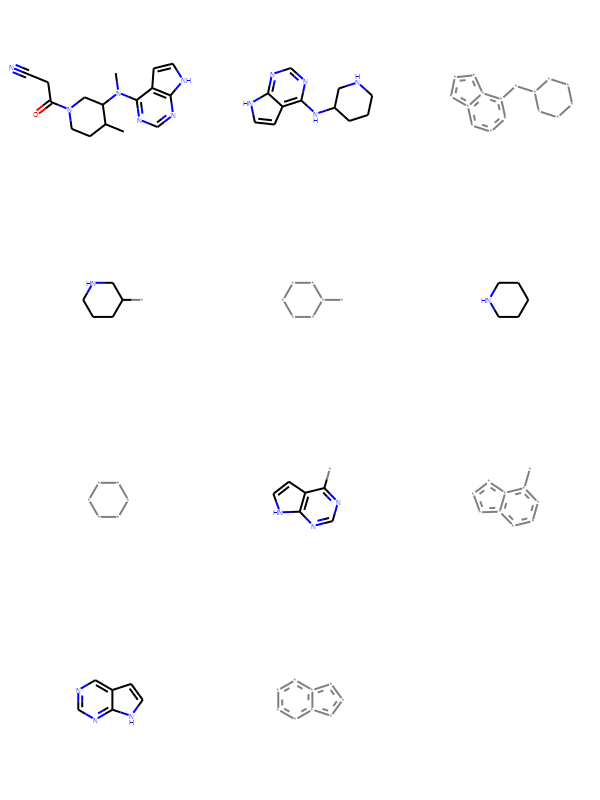

In [8]:
g = nx.graph.Graph()
rdk_nodes = [Chem.MolFromSmiles(sma) for sma in netwks.nodes]
Draw.MolsToGridImage(rdk_nodes)

In [9]:
for idx, node in enumerate(netwks.nodes):
    g.add_node(idx, smiles=node, img=smi2image(node), hac=Chem.MolFromSmiles(node).GetNumAtoms())

In [10]:
g.number_of_nodes()
g.add_edges_from([(e.beginIdx,e.endIdx) for e in netwks.edges])
cy_g = cytoscape_data(g)

In [11]:
stobj=[
  {'style': [{'css': {
      'background-color': 'blue',
      'shape' : 'rectangle',
      'width':600,
      'height':400,
      'border-color': 'rgb(0,0,0)',
      'border-opacity': 1.0,
      'border-width': 0.0,
      'color': '#4579e8',
      'background-image':'data(img)',
      'background-fit':'contain'
                    },
    'selector': 'node'},
            {'css': {
                'width': 20.0,
            },
            'selector': 'edge'}
            ],
  }]


In [12]:
cyobj=Cytoscape(data=cy_g, visual_style=stobj[0]['style'], layout_name='breadthfirst')
cyobj

Cytoscape(data={'data': [], 'directed': False, 'multigraph': False, 'elements': {'nodes': [{'data': {'smiles':…